<a href="https://colab.research.google.com/github/M4NCHU/AI-Project/blob/main/SadOrSmile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wczytanie danych

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [5]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

In [7]:
! mkdir ~/.kaggle

In [8]:
! cp kaggle.json ~/.kaggle/

In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
!kaggle datasets download -d aravindanr22052001/emotiondetection-happy-or-sad

In [ ]:
!unzip drive/SadOrHappy/data/emotiondetection-happy-or-sad.zip

In [ ]:
!pip list

In [2]:
#  import biblioteki TensorFlow, która jest narzędziem do tworzenia i trenowania modeli uczenia maszynowego
import tensorflow as tf
import os

In [3]:
# konfiguracja wykorzystania pamięci GPU w bibliotece TensorFlow.
# ustawia tryb dynamicznego przydzielania pamięci. Oznacza to, że TensorFlow będzie elastycznie alokować tylko tyle pamięci GPU, ile jest potrzebne dla bieżących obliczeń
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  #  pobiera listę dostępnych urządzeń GPU w systemie.
  tf.config.experimental.set_memory_growth(gpu, True)

# Usuwanie niepotrzebnych zdjęć

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
# folder ze zdjęciami
data_dir = 'data' 

In [ ]:
os.listdir(os.path.join(data_dir, 'sad'))

['artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg',
 'sad-person-concept-vector-26538685.jpg',
 '324867_1100-1100x628.jpg',
 'running-mascara.jpg',
 'de2a0f4d137d0aeb839d43a2ea9b6c72.jpg',
 '5cd731f92100002f007a7304.jpeg',
 'DD-blogpost-SAD-940x492.png',
 'sad-people-group-therapy-session_23-2148752071.jpg',
 '8iAb9k4aT.jpg',
 '14HRhniN7B7Fqx5GCoFpQ3A.jpeg',
 'sadpeople.jpg',
 'sad-man-group-happy-people-men-young-89610186.jpg',
 '8884_sue.jpg',
 '500x500.jpg',
 'african-american-depressive-sad-broken-260nw-475790911.jpg',
 '5acf9ed1146e711e008b46d7.jpg',
 '21-214455_sad-person-png-transparent-sad-person-png-png.png',
 'sad-people-icon-2CCHXB2.jpg',
 'sad-depressed-man.jpg',
 '280-2804580_sad-people-png-sad-person-png-transparent-png.png',
 'v4-460px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'vector-set-sad-people-hand-drawn-cartoon-doodle-illustration-vector-set-sad-people-119222297.jpg',
 '766x415_Depression_vs_Sadness-1-732x415.jpg',
 'depression-1038x576.jpg',
 '504212.jpg',
 'b2ap3_lar

In [ ]:
# Dozwolone rozszerzenia plików
image_ext = ['jpeg','jpg','bmp', 'png']

In [ ]:
# pętla po zdjęciach
# for image_class in os.listdir(data_dir):
#   for image in os.listdir(os.path.join(data_dir, image_class)):
#     print(image)

artworks-inq7uS3bz9CqNd3d-fqs6TA-t500x500.jpg
sad-person-concept-vector-26538685.jpg
324867_1100-1100x628.jpg
running-mascara.jpg
de2a0f4d137d0aeb839d43a2ea9b6c72.jpg
5cd731f92100002f007a7304.jpeg
DD-blogpost-SAD-940x492.png
sad-people-group-therapy-session_23-2148752071.jpg
8iAb9k4aT.jpg
14HRhniN7B7Fqx5GCoFpQ3A.jpeg
sadpeople.jpg
sad-man-group-happy-people-men-young-89610186.jpg
8884_sue.jpg
500x500.jpg
african-american-depressive-sad-broken-260nw-475790911.jpg
5acf9ed1146e711e008b46d7.jpg
21-214455_sad-person-png-transparent-sad-person-png-png.png
sad-people-icon-2CCHXB2.jpg
sad-depressed-man.jpg
280-2804580_sad-people-png-sad-person-png-transparent-png.png
v4-460px-Make-a-Sad-Person-Happy-Step-10.jpg
vector-set-sad-people-hand-drawn-cartoon-doodle-illustration-vector-set-sad-people-119222297.jpg
766x415_Depression_vs_Sadness-1-732x415.jpg
depression-1038x576.jpg
504212.jpg
b2ap3_large_happy-sad-unsplash-850x575.jpg
2560px-Sad-Mental-Illness.jpg
sad-people-vector-26812552.jpg
isolate

In [ ]:
#img = cv2.imread(os.path.join('data','happy','05-12-21-happy-people.jpg'))

In [ ]:
#img.shape

(880, 1400, 3)

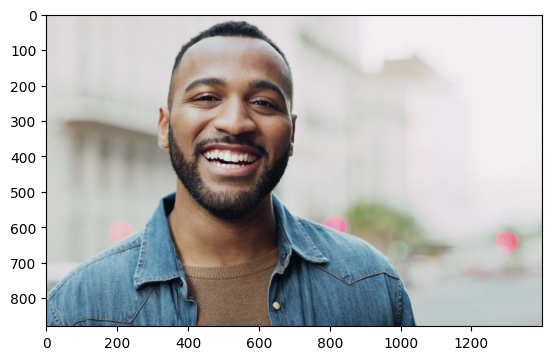

In [ ]:
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.show()

In [ ]:
# Sprawdzanie czy wszystkie rozszerzenia są poprawne
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext: 
                print('Zdjęcie posiada niepoprawne rozszerzenie {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Błąd ze zdjęciem {}'.format(image_path))
            # os.remove(image_path)

Zdjęcie posiada niepoprawne rozszerzenie data/sad/5cd731f92100002f007a7304.jpeg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/sad-people-group-therapy-session_23-2148752071.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/14HRhniN7B7Fqx5GCoFpQ3A.jpeg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/african-american-depressive-sad-broken-260nw-475790911.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/2560px-Sad-Mental-Illness.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/44861512-smiling-man-in-a-crowd-of-sad-people.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/50740738-portrC3A4ts-der-traurige-menschen.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/sad-people-chairs-group-therapy-session_23-2148752072.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/cry-360x240.gif
Zdjęcie posiada niepoprawne rozszerzenie data/sad/secret-signs-of-loneliness-01-1440x810.jpg
Zdjęcie posiada niepoprawne rozszerzenie data/sad/1800x1200_visual_guide_to_seasonal_af

# Wczytywanie danych

In [ ]:
# tf.data.Dataset??

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Budowanie bazę zdjęc w locie, przez co nie trzeba budować klas itp.
# tworzenia obiektu zbioru danych z katalogu zawierającego obrazy
data = tf.keras.utils.image_dataset_from_directory('data')

Found 148 files belonging to 2 classes.


In [ ]:
# Konwersja na numpy_iterator
# konwertuje go na iterator, który zwraca kolejne elementy zbioru danych jako tablice NumPy.
data_iterator = data.as_numpy_iterator()

In [ ]:
#  pobiera następny element z iteratora zbioru danych
batch = data_iterator.next()

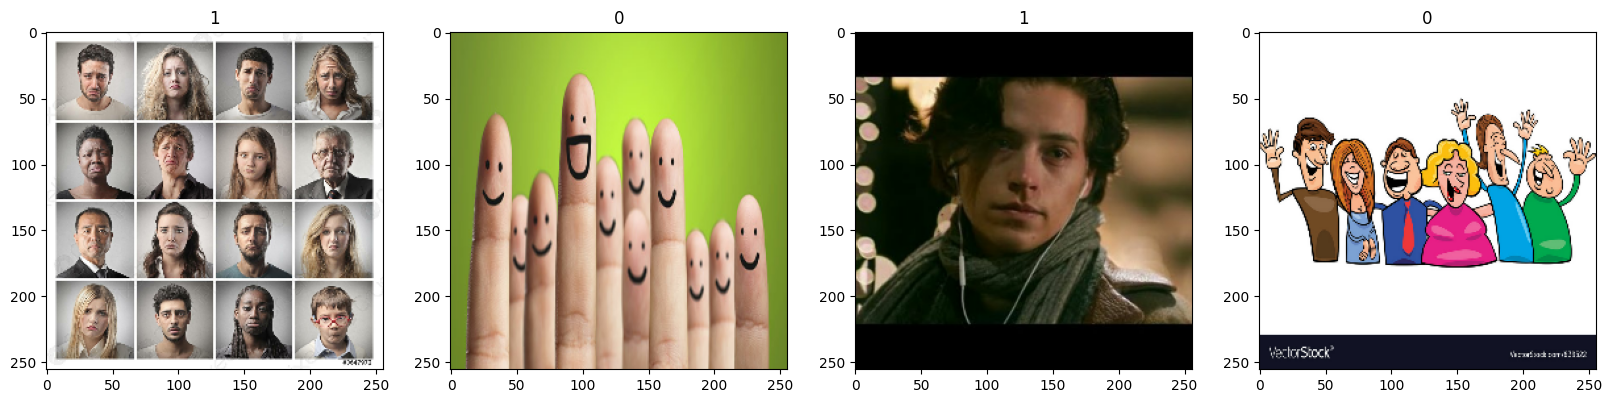

In [ ]:
# Tworzy wykres z 4 podwykresami i wyświetla obrazy z pierwszej partii danych.
# ustala rozmiar całego wykresu na 20 cali na 20 cali.
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  # ustawia obraz na podwykresie o indeksie idx za pomocą funkcji imshow z biblioteki matplotlib.pyplot.
    ax[idx].imshow(img.astype(int))
    # ustawia tytuł dla danego podwykresu na podstawie etykiety obrazu z batch[1] o indeksie idx.
    ax[idx].title.set_text(batch[1][idx])

# Preprocessing


Skalowanie

In [ ]:
# Mapowanie po danych i transformacja
# W funkcji lambda (lambda x, y: (x/255, y)), x i y są argumentami, które reprezentują kolejno obrazy i etykiety w zbiorze danych. Wyrażenie (x/255, y)
# dzieli wartości obrazów przez 255, co skutkuje ich normalizacją do zakresu od 0 do 1. Etykiety pozostają bez zmian.
data = data.map(lambda x,y: (x/255, y))

In [ ]:
# zwraca maksymalną wartość pikseli w pierwszym elemencie zbioru danych.
data.as_numpy_iterator().next()[0].max()

1.0

Podział danych

In [ ]:
# obliczają rozmiary zbiorów danych treningowych, walidacyjnych i testowych na podstawie całkowitej liczby elementów w zbiorze danych.
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size+val_size+test_size

4

In [ ]:
len(data)

5

In [ ]:
#  wykonują podział zbioru danych na zbiory treningowe, walidacyjne i testowe.
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(val)

1

# Model

In [ ]:
train

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
# tworzy pusty model sekwencyjny w bibliotece Keras.
model = Sequential()

In [ ]:

# Te linie kodu definiują architekturę modelu sieci neuronowej.
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Ta linia kodu kompiluje model, przygotowując go do procesu uczenia.
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:

# Ta linia kodu wypisuje podsumowanie architektury modelu.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Trening


In [ ]:

# Ten fragment kodu definiuje ścieżkę, w której będą zapisywane dzienniki (logs) podczas treningu modelu.
logdir='logs'

In [ ]:
# Ten fragment kodu tworzy obiekt zwrotny TensorBoard w bibliotece Keras.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
# Informacje o modelu
# Ten fragment kodu trenuje model za pomocą danych treningowych train przez 20 epok, z walidacją na danych val i z wykorzystaniem obiektu zwrotnego TensorBoard 
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 15s 4s/step - loss: 2.4575 - accuracy: 0.5000 - val_loss: 1.8542 - val_accuracy: 0.4688
Epoch 2/20
3/3 [==============================] - 12s 3s/step - loss: 1.0360 - accuracy: 0.5417 - val_loss: 0.7880 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 20s 6s/step - loss: 0.7063 - accuracy: 0.5417 - val_loss: 0.7094 - val_accuracy: 0.4062
Epoch 4/20
3/3 [==============================] - 14s 4s/step - loss: 0.6923 - accuracy: 0.4896 - val_loss: 0.6561 - val_accuracy: 0.5938
Epoch 5/20
3/3 [==============================] - 13s 4s/step - loss: 0.6387 - accuracy: 0.5417 - val_loss: 0.6963 - val_accuracy: 0.4375
Epoch 6/20
3/3 [==============================] - 13s 4s/step - loss: 0.5586 - accuracy: 0.6458 - val_loss: 0.6622 - val_accuracy: 0.5625
Epoch 7/20
3/3 [==============================] - 14s 4s/step - loss: 0.6042 - accuracy: 0.6667 - val_loss: 0.4650 - val_accuracy: 0.9062
Epoch 8/20
3/3 [==================

Wydajność

Loss

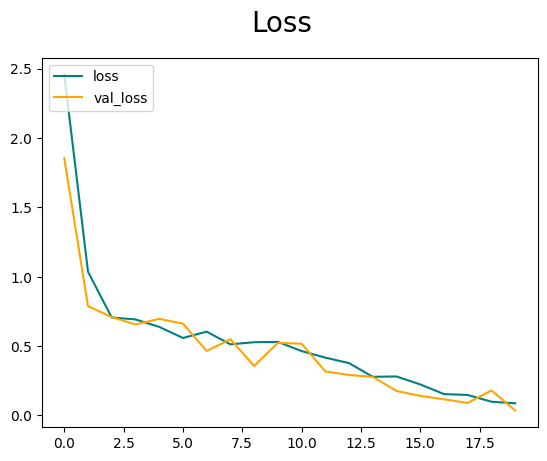

In [ ]:

# Ten fragment kodu tworzy wykres z historią funkcji straty (loss) dla treningu i walidacji.
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Dokładność

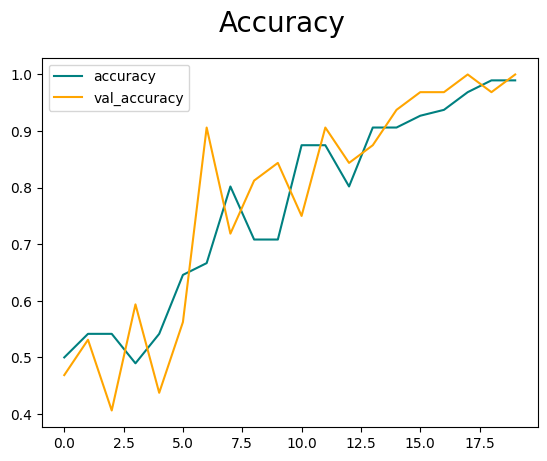

In [ ]:
# Ten fragment kodu tworzy wykres z historią metryki dokładności (accuracy) dla treningu i walidacji.
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Ocena

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
# Ten fragment kodu tworzy trzy obiekty metryk w bibliotece Keras: Precision, Recall i BinaryAccuracy.
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
# Ten fragment kodu oblicza metryki Precision, Recall i BinaryAccuracy dla danych testowych.
# iteruje przez kolejne partie danych testowych.
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Testowanie

In [ ]:
import cv2

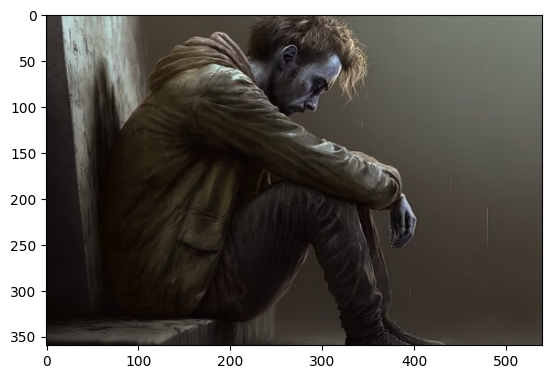

In [ ]:
img = cv2.imread('sadperson.jpg')
plt.imshow(img)
plt.show()

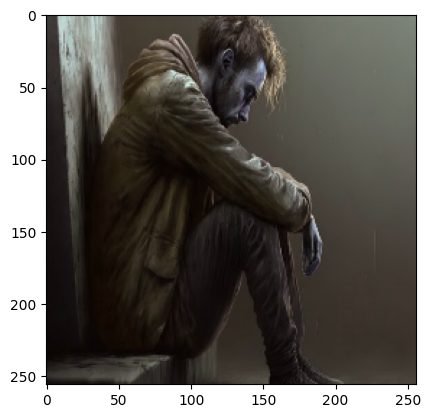

In [ ]:

# Ten fragment kodu wykonuje skalowanie obrazu img do rozmiaru (256, 256) za pomocą biblioteki TensorFlow i wyświetla zeskalowany obraz.
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# Ten fragment kodu wykonuje predykcję za pomocą wytrenowanego modelu na pojedynczym obrazie.
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 46ms/step


In [ ]:
yhat

array([[0.9844629]], dtype=float32)

In [ ]:
if yhat > 0.5: 
    print(f'Osoba jest smutna')
else:
    print(f'Osoba jest szczęśliwa')

Osoba jest smutna


# Zapisywanie modelu

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# Ten fragment kodu zapisuje wytrenowany model do pliku o nazwie "imageclassifier.h5" w podfolderze "models".
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:

# Ten fragment kodu wczytuje model z pliku "imageclassifier.h5", który został wcześniej zapisany, i przypisuje go do zmiennej new_model.
new_model = load_model('models/imageclassifier.h5')

In [ ]:
# Ten fragment kodu wykonuje predykcję za pomocą wczytanego modelu new_model na przetworzonym obrazie.
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 112ms/step


array([[0.9844629]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
# Obliczenie i wyświetlenie macierzy konfuzji
y_pred = new_model.predict(test)
y_pred = np.round(y_pred).flatten()
y_true = []
for batch in test.as_numpy_iterator():
    _, labels = batch
    y_true.extend(labels)
y_true = np.array(y_true)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predykowane etykiety")
plt.ylabel("Rzeczywiste etykiety")
plt.title("Macierz konfuzji")
plt.show()